# **Projet - Partie 1 : Regression**
*Kuassi Pierre DOVODJI et Amandine LIAGRE*

# Sommaire

- [Objectif du projet](#Introduction)
    - [Description du Dataset](#Description)
    - [Variables](#Type-des-variables)
- [1. Analyse Exploratoire des Données (EDA)](#analyse)
    - [Analyse des valeurs manquantes et diagnostique de la base de données](#Missing-values)
    - [Statistique descriptive](#stat-descriptives)
- [2. Modèles de régression](#Régression)
    - [Séparation des données de validation et test](#separation)
    - [K plus proche voisins](#K)
    - [Arbres de décision](#arbres)
    - [Forêt aléatoire](#foret)
    - [Gradient Boosting](#gradient)
    - [XGBoost](#xgboost)
- [3. Comparaison des modèles](#comparaison)
- [4. Importance par permutation](#importance)
- [Conclusion](#Conclusion)

## Objectif du Projet

L'objectif de ce projet est de prédire la consommation de carburant des voitures en termes de miles par gallon (mpg) en fonction de leurs caractéristiques techniques. Pour cela, nous utilisons **Auto MPG Dataset** qui contient des informations sur divers attributs des voitures, tels que la cylindrée, le poids, l'accélération, et d'autres propriétés, qui seront utilisées pour prédire la consommation de carburant (mpg).

## Description du Dataset

Le **Auto MPG Dataset** est une version légèrement modifiée du dataset fourni dans la bibliothèque StatLib, utilisée par Ross Quinlan (1993) pour prédire l'attribut "mpg". Huit variables originales ont été supprimées car elles contenaient des valeurs manquantes pour l'attribut `mpg`. Ce dataset contient des données sur la consommation de carburant des voitures en cycle urbain, mesurée en miles par gallon, et il est constitué de 3 variables discrètes et 5 variables continues.

#### Variables :
#### Variables Continues :
- **displacement (Cylindrée)** : La cylindrée du moteur de la voiture (en pouces cubes).
- **horsepower (Puissance)** : La puissance du moteur (en chevaux-vapeur), avec certaines valeurs manquantes.
- **weight (Poids)** : Le poids de la voiture (en livres).
- **acceleration (Accélération)** : L'accélération de la voiture (en secondes pour passer de 0 à 60 mph).
- **mpg (Consommation de carburant)** : La consommation de carburant de la voiture en miles par gallon (variable cible).
#### Variables Discrètes :
- **cylinders (Cylindres)** : Le nombre de cylindres du moteur (valeurs discrètes).
- **model_year (Année du modèle)** : L'année du modèle de la voiture (valeurs discrètes).
- **origin (Origine)** : Le pays d'origine de la voiture (valeurs discrètes).

Ce dataset sera utilisé pour construire un modèle de régression afin de prédire la consommation de carburant des voitures en fonction de leurs caractéristiques techniques. Nous procéderons à l'analyse exploratoire des données, à la gestion des valeurs manquantes, suivie de la préparation des données et de la construction des modèles prédictifs.


# 1. Analyse Exploratoire des Données (EDA)

In [10]:
# Importation des packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimpy
import seaborn as sns
from tabulate import tabulate
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)

### Chargement du dataset

In [11]:
#!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 

X = auto_mpg.data.features 
y = auto_mpg.data.targets  
#print(auto_mpg.metadata)  
#print(auto_mpg.variables) 

Voici un aperçu rapide de nos données:

In [12]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


### Analyse des valeurs manquantes et diagnostique de la base de données

In [13]:
df = pd.concat([X,y], axis=1)
skimpy.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 398    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 8      │ │ int64       │ 4     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ displacement     │   0 │      0 │   193.4 │    104.3 │     68 │  104.2 │  148.5 │    262 │   455 │ ▇▃▃▂▂▁  │  │
│ │ cylinders        │   0 │      0 │   5.455 │    1.701 │      3 │      4 │      4 │      8 │     8 │  ▇ ▃ ▅  │  │
│ │ horsepower       │   6 │   1.51 │   104.5 │    38.49 │     46 │     75 │   93.5 │    126 │   230 │ ▅▇▂▃▁▁  │  │
│ │ weight           │   0 │      0 │    2970 │    846.8 │   1613 │   2224 │   2804 │   3608 │  5140 │ ▇▇▆▅▃▁  │  │
│ │ acceleration     │   0 │      0 │   15.57 │    2.758 │      8 │  13.83 │   15.5 │  17.18 │  24.8 │  ▁▅▇▆▁  │  │
│ │ model_year       │   0 │      0 │   76.01 │    3.698 │     70 │     73 │     76 │     79 │    82 │ ▅▆▅▆▆▇  │  │
│ │ origin           │   0 │      0 │   1.573 │   0.8021 │      1 │      1 │      1 │      2 │     3 │ ▇  ▂ ▃  │  │
│ │ mpg              │   0 │      0 │   23.51 │    7.816 │      9 │   17.5 │     23 │     29 │  46.6 │ ▅▇▇▅▂▁  │  │
│ └──────────────────┴─────┴────────┴─────────┴──────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

La base de données contient 398 lignes et 8 colonnes, avec des variables quantitatives (``float64``: 4 colonnes et ``int64``: 4 colonnes). Les variables incluent le déplacement, le nombre de cylindres, la puissance, le poids, l'accélération, l'année du modèle, l'origine et la consommation de carburant. Certaines variables présentent une forte variance, comme le poids (846,8), tandis que d'autres comme l'origine sont moins variées. Les données montrent des distributions asymétriques, avec des valeurs concentrées dans certaines plages pour plusieurs colonnes.

### Données manquantes 

In [14]:
df.isna().sum()

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

La base de données a 6 valeurs manquantes dans la colonne ``horsepower``. Les autres colonnes sont complètes, sans valeurs manquantes. Nous allons imputer ses valeurs manquantes par la moyenne.

In [15]:
# Imputatation
mean_horsepower = X['horsepower'].mean()
X['horsepower'].fillna(mean_horsepower, inplace=True)
df['horsepower'].fillna(mean_horsepower, inplace=True)

In [16]:
X['horsepower'].isna().sum(), df['horsepower'].isna().sum(), 

(0, 0)

### Statistique descriptive 

Afin de mieux appréhender notre jeu de donnée, nous allons réaliser quelques statistiques descriptives.

#### Corrélation

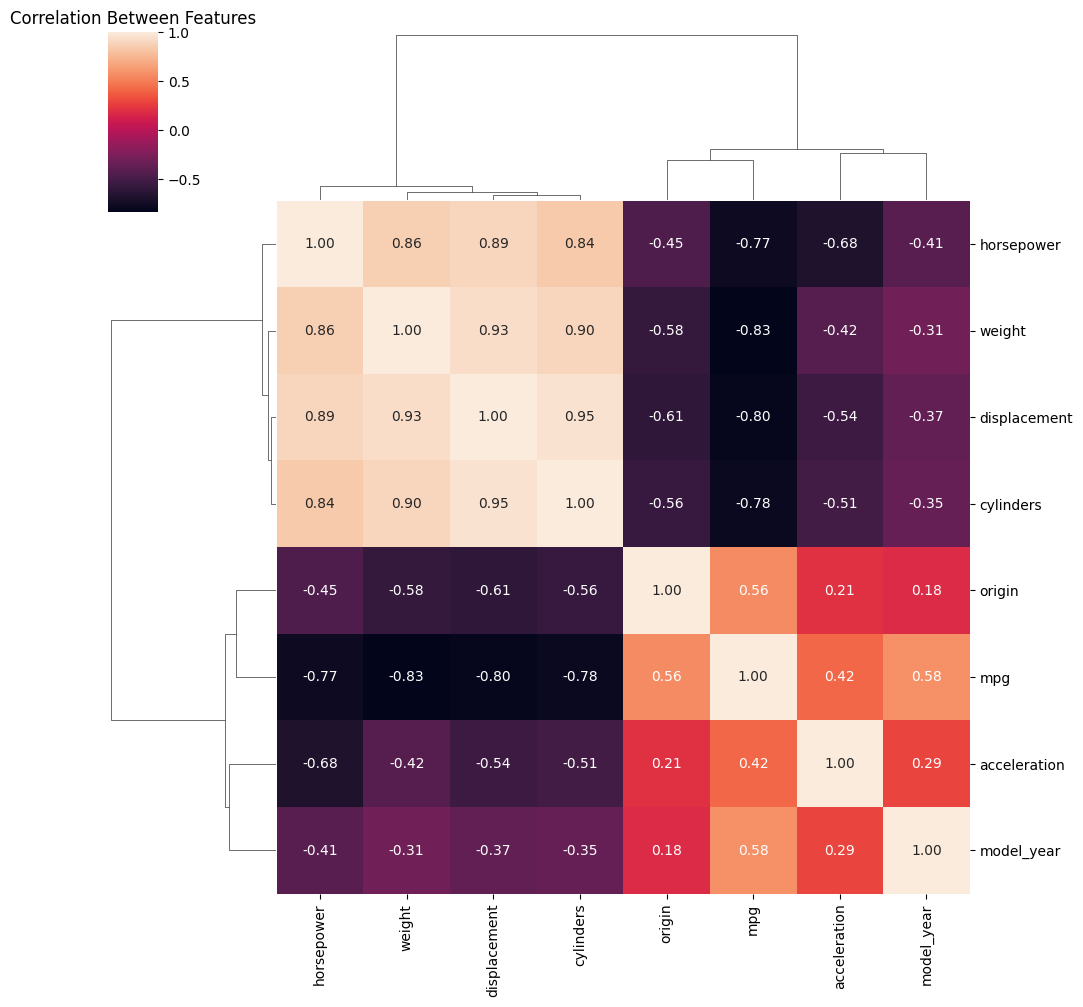

In [17]:
corr_matrix = df.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f", figsize=(8, 8))
plt.title("Correlation Between Features")
plt.show()

Les variables les plus corrélées sont displacement et cylinders (0.95), ainsi que displacement et weight (0.93). mpg a des corrélations négatives fortes avec displacement, cylinders, horsepower, et weight, mais positives avec acceleration et model_year.

<Figure size 1500x1000 with 0 Axes>

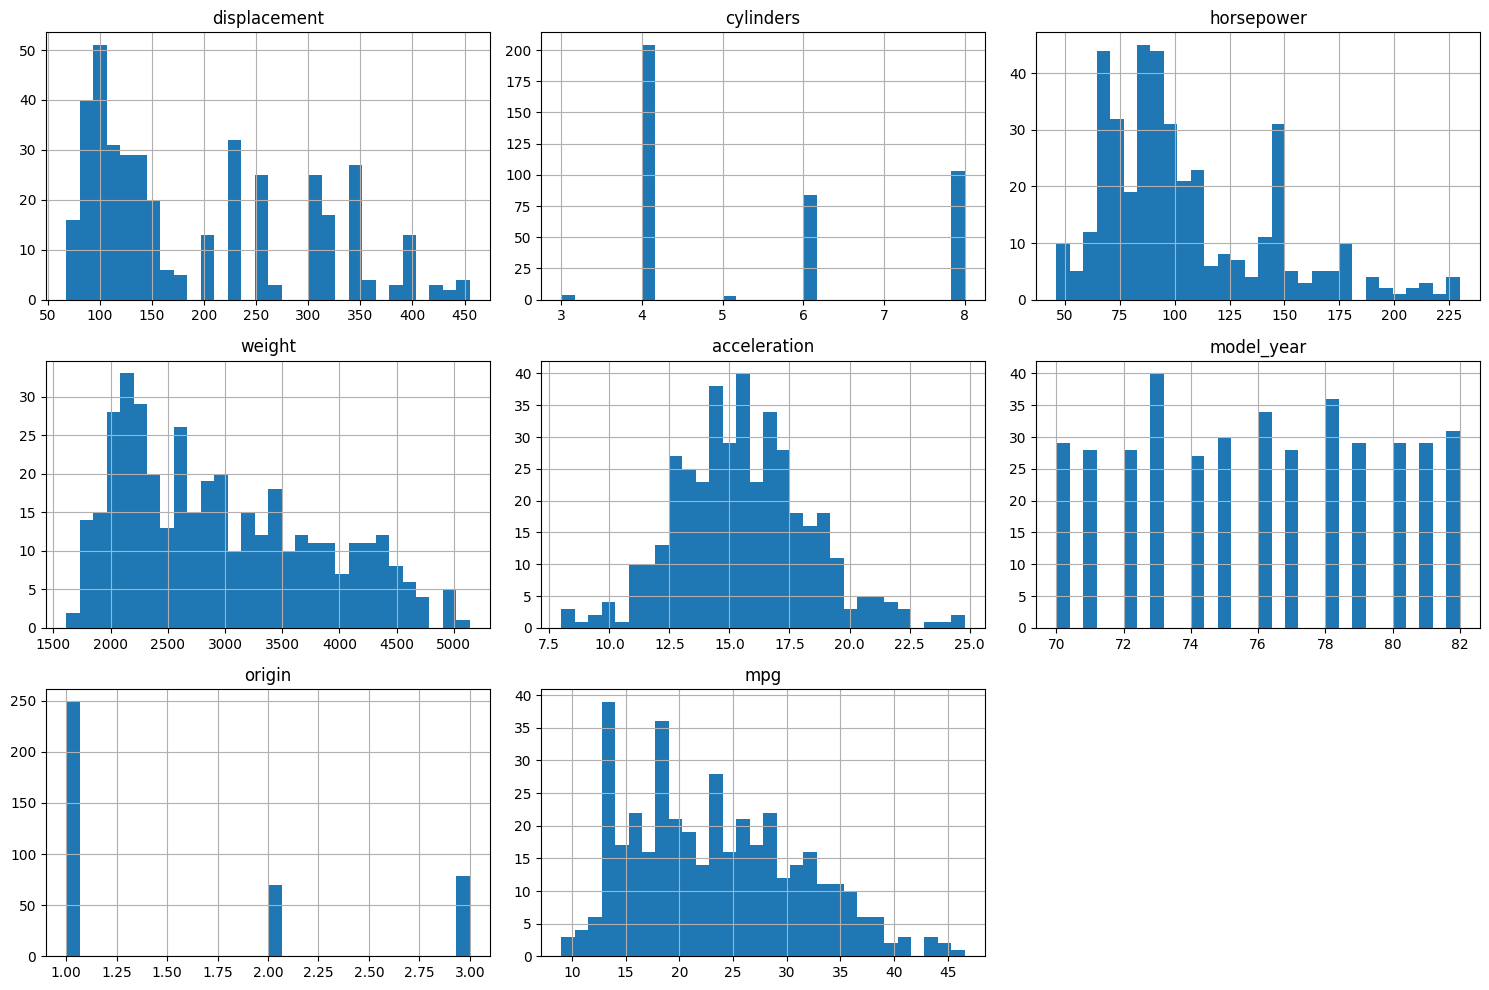

In [18]:
plt.figure(figsize=(15,10))
df.hist(bins=30, figsize=(15, 10), layout=(int(len(df.columns)/3)+1, 3))
plt.tight_layout()
plt.show()

Les variables comme **cylinders**, **weight** et **horsepower** montrent des tendances distinctes qui pourraient jouer un rôle clé dans la prédiction de la consommation (**mpg**). De plus, la variable **model_year** est uniformément représentée, ce qui limite le risque de biais temporel. Les variables telles que **displacement**, **horsepower** et **weight** présentent des étendues larges et variées, reflétant la diversité des véhicules étudiés. La variable cible semble avoir une distribution normale.

# 2. Modèles

Nous allons tester différentes méthodes de régression pour prédire la qualité des vins, notamment le K-Nearest Neighbors (KNN), les arbres de décision, les forêts aléatoires, les machines à vecteurs de support (SVM) et le Gradient Boosting. Chaque modèle sera optimisé à l'aide de la validation croisée et des recherches d'hyperparamètres pour obtenir les meilleures performances possibles. Nous comparerons ensuite les modèles en utilisant une métrique d'erreur, l'erreur quadratique moyenne (Mean Squared Error, MSE), afin de déterminer le modèle réalisant les prédictions les plus précises. On commencera par séparer les données afin de disposer d'une base d'apprentissage et de test.

### Séparation des données de validation et test

Pour séparer les données en ensembles d'entraînement et de test, nous utilisons la fonction train_test_split de la bibliothèque sklearn.model_selection. Cette fonction permet de diviser les données en deux ensembles : un pour l'entraînement du modèle (75% des données) et un pour les tests (25% des données), comme spécifié par le paramètre test_size=0.25. Le paramètre random_state=42 permet de garantir la reproductibilité de la séparation.

Une fois les données séparées, nous avons également commenté les lignes de code qui normalisent les données en utilisant StandardScaler pour ajuster et transformer les ensembles d'entraînement et de test. Cette étape est importante pour standardiser les caractéristiques (variables d'entrée) afin de les amener sur une même échelle. 

Pour évaluer les modèles, nous utiliserons plusieurs métriques de performance, à savoir le : **MSE (Mean Squared Error)**, le **RMSE (Root Mean Squared Error)**, le **MAE (Mean Absolute Error)** et le **R² (coefficient de détermination)**. 
- **MSE** mesure la moyenne des erreurs quadratiques, pénalisant davantage les grandes erreurs. 
- **RMSE** est simplement la racine carrée du MSE, ce qui permet d'obtenir une erreur dans les mêmes unités que les données d'origine. 
- **MAE** calcule la moyenne des erreurs absolues, donnant une mesure directe de l'écart moyen entre les prédictions et les valeurs réelles. 
- **R²** évalue la proportion de la variance des données expliquée par le modèle, avec une valeur proche de 1 indiquant une bonne qualité d'ajustement.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = scaler.fit_transform(X_train)  # Ajuster aux données d'entraînement
X_test = scaler.transform(X_test) 

In [20]:
X_train.shape, y_train.shape

((298, 7), (298, 1))

In [21]:
X_test.shape, y_test.shape

((100, 7), (100, 1))

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR

In [23]:
def metric(y, y_pred):
    """
    Calcule plusieurs métriques d'évaluation pour un modèle de régression.

    Args:
        y : Les valeurs réelles des cibles.
        y_pred : Les prédictions faites par le modèle.

    Returns:
        np.ndarray: Un tableau 1x4 contenant les métriques suivantes :
            - Mean Squared Error (MSE)
            - Root Mean Squared Error (RMSE)
            - Mean Absolute Error (MAE)
            - Coefficient de détermination (R²)
    """
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return [mse, rmse, mae, r2]

name_score = ['MSE', 'RMSE', 'MAE', 'R2']
def print_score(scores):
    scores_df = pd.DataFrame(scores, columns=name_score, index= ["train", "test"])
    print(tabulate(scores_df, headers="keys", tablefmt="github"))

## 2.1. K plus proche voisins

Le k plus proches voisins (KNN) est un algorithme d'apprentissage supervisé qui effectue des prédictions en fonction des k voisins les plus proches d'un point de données. En classification, il attribue la classe la plus fréquente parmi les voisins, tandis qu'en régression, il calcule la moyenne des valeurs des voisins. Le paramètre clé, **k**, détermine le nombre de voisins à considérer et influence les performances du modèle. 

Pour mettre oeuvre cet algorithme nous utiliserons la  fonction ``fit_model_knn`` en se servant de la fonction ``GridSearchCV`` pour optimiser l'hyperparamètre ``n_neighbors (nombre de voisin)`` (k) du modèle KNN, en testant des valeurs de 1 à 100 avec une validation croisée à 5 blocs. Elle ajuste le modèle sur les données d'entraînement, évalue sa performance sur les données de test, et renvoie le modèle optimisé, la performance, ainsi que les meilleurs paramètres trouvés.



In [24]:
def fit_model_knn(X_train, X_test, y_train, y_test):

    """
    Entraîne et optimise un modèle de régression par k plus proches voisins (KNeighborsRegressor)
    à l'aide de GridSearchCV.

    Args:
        X_train :  Les données d'entraînement (features).
        X_test : Les données de test (features).
        y_train : Les cibles associées aux données d'entraînement.
        y_test : Les cibles associées aux données de test.

    Returns:
        mod (KNeighborsRegressor): Le modèle optimisé avec les meilleurs hyperparamètres.
        scores (float): La métrique de performance calculée sur les données de test.
        mod_cv.cv_results_ (dict): Les résultats détaillés de la validation croisée.
        mod_cv.best_params_ (dict): Les meilleurs hyperparamètres trouvés.
    """
    mod = KNeighborsRegressor()
    parameters = {'n_neighbors': range(1,101)}
    mod_cv = GridSearchCV(mod, parameters, cv=5, n_jobs=-1).fit(X_train, y_train)
    mod = mod_cv.best_estimator_
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    y_train_pred = mod.predict(X_train)
    scores = (metric(y_train, y_train_pred), metric(y_test, y_pred))
    return mod, scores, mod_cv.cv_results_, mod_cv.best_params_

In [25]:
model_knn, scores_knn, result_cv_knn, p_knn = fit_model_knn(X_train, X_test, y_train, y_test)

In [26]:
print("------------------------KNN-----------------------")
print_score(scores_knn)
print(p_knn)

------------------------KNN-----------------------
|       |     MSE |    RMSE |     MAE |       R2 |
|-------|---------|---------|---------|----------|
| train | 6.95649 | 2.63752 | 1.81994 | 0.888391 |
| test  | 6.68354 | 2.58525 | 1.94257 | 0.882298 |
{'n_neighbors': 7}


Le modèle KNN, avec **7 voisins** optimaux, montre des performances similaires sur les ensembles d'entraînement et de test : un **MSE** de 6.96 et 6.68, un **RMSE** de 2.64 et 2.59, un **MAE** de 1.82 et 1.94, et un **R²** de 0.89 et 0.88 respectivement. Ces résultats indiquent une bonne généralisation sans surapprentissage évident.

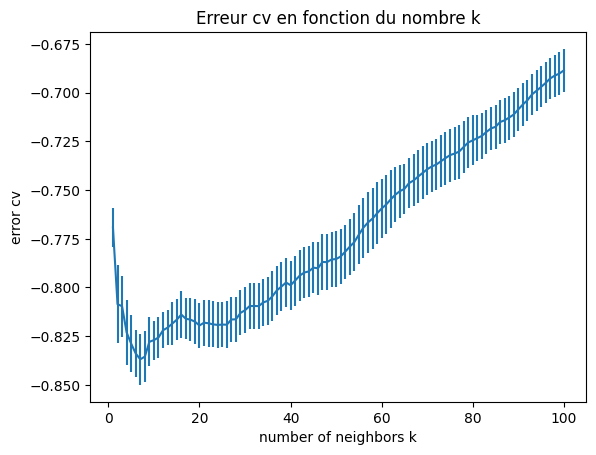

In [27]:
err_cv = -result_cv_knn['mean_test_score']
plt.errorbar(result_cv_knn['param_n_neighbors'],-result_cv_knn['mean_test_score'],result_cv_knn['std_test_score']/np.sqrt(5))
plt.xlabel('number of neighbors k')
plt.ylabel('error cv')
plt.title("Erreur cv en fonction du nombre k")
plt.show()

La courbe montre l'évolution de l'erreur de validation en fonction du nombre de voisins. On observe que l'erreur de validation atteint son minimum lorsque le nombre de voisins est égal à 7, puis elle commence à augmenter au-delà de ce seuil. 

## 2.2 Arbre de décision

L'arbre de décision est une approche qui permet de construire des partitions rectangulaires dans l'espace des caractéristiques, en se basant sur une variable $ X_j $ et un seuil $ t_j $. À chaque étape, l'algorithme cherche à optimiser la séparation des données en sélectionnant la variable $ X_i $ et le seuil $ t_j $ qui minimisent l'erreur, comme le MSE (Mean Squared Error) pour la régression ou le critère de Gini pour la classification. Ce processus se répète de manière récursive jusqu'à ce que l'arbre atteigne un critère d'arrêt, comme une profondeur maximale ou un nombre minimum d'échantillons dans chaque feuille. 

Pour la mise en place, on utilise la fonction `DecisionTreeRegressor` et on optimise ses hyperparamètres via `RandomizedSearchCV`. Cette dernière explore différentes combinaisons de paramètres comme `min_samples_leaf`, `max_features`, et `max_depth` avec une validation croisée à 5 blocs. Ensuite, le modèle optimal est entraîné, on obtient des prédictions sur les données de test et la performance, tout en renvoyant le modèle, les scores, les résultats de la validation croisée et les meilleurs paramètres trouvés.




In [28]:
def fit_model_tree(X_train, X_test, y_train,  y_test):
    """
    Entraîne et optimise un modèle de régression par arbre de décision (DecisionTreeRegressor) 
    à l'aide de GridSearchCV.

    Args:
        X_train : Les données d'entraînement (features).
        X_test : Les données de test (features).
        y_train : Les cibles associées aux données d'entraînement.
        y_test : Les cibles associées aux données de test.

    Returns:
        mod (DecisionTreeRegressor): Le modèle optimisé avec les meilleurs hyperparamètres.
        scores : La métrique de performance calculée sur les données de test.
        mod_cv.cv_results_ : Les résultats détaillés de la validation croisée.
        mod_cv.best_params_ (dict): Les meilleurs hyperparamètres trouvés.
    """
    mod = DecisionTreeRegressor()
    parameters = {
        "min_samples_leaf": range(1, 10),
        "max_features": ["auto", "sqrt", "log2"],
        "max_depth": range(1, 10),
        "min_samples_split": range(2, 10)}
    mod_cv = GridSearchCV(mod, parameters, cv=5, n_jobs=-1).fit(X_train, y_train)
    mod = mod_cv.best_estimator_
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    y_train_pred =mod.predict(X_train)
    scores = (metric(y_train, y_train_pred), metric(y_test, y_pred))
    return mod, scores, mod_cv.cv_results_, mod_cv.best_params_

In [29]:
model_tree, scores_tree, r_tree,p_tree = fit_model_tree(X_train, X_test, y_train, y_test)

In [30]:
print("-----------------------TREE----------------------")
print_score(scores_tree)
print(p_tree)

-----------------------TREE----------------------
|       |      MSE |    RMSE |     MAE |       R2 |
|-------|----------|---------|---------|----------|
| train |  7.57383 | 2.75206 | 1.88987 | 0.878486 |
| test  | 10.8854  | 3.2993  | 2.45202 | 0.8083   |
{'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 4}


Le modèle, optimisé avec des paramètres optimal, atteint un R² de 0.79 en entraînement et 0.84 en test, avec un MAE respectif de 2.55 et 2.28, montrant une bonne généralisation.

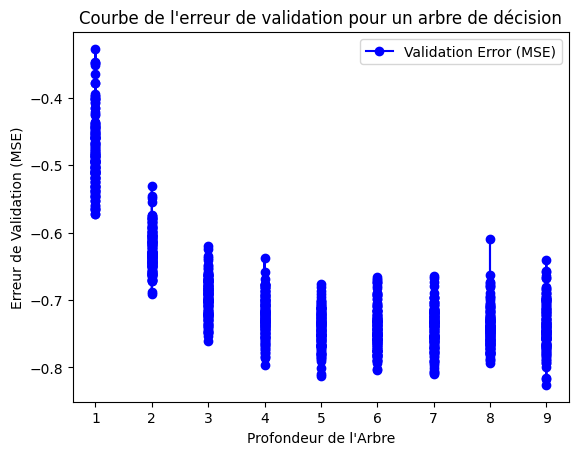

In [31]:

plt.plot(r_tree['param_max_depth'], -r_tree['mean_test_score'], marker='o', color='b', label='Validation Error (MSE)')
plt.xlabel('Profondeur de l\'Arbre')
plt.ylabel('Erreur de Validation (MSE)')
plt.title('Courbe de l\'erreur de validation pour un arbre de décision')
plt.legend()
plt.show()

## 2.3. Forêt aléatoire

Le Random Forest est une méthode d'ensemble qui consiste à entraîner plusieurs arbres de décision indépendants. Chaque arbre est construit sur un sous-ensemble des données d'entraînement, sélectionné aléatoirement, et utilise un sous-ensemble des caractéristiques pour chaque division. Cela permet d'améliorer la précision du modèle tout en réduisant le risque de surapprentissage. Le résultat final est obtenu par agrégation des prédictions de tous les arbres, soit par moyenne dans le cas de la régression, soit par vote majoritaire dans le cas de la classification.

Dans le cadre de la régression, nous le mettons en place avec la fonction `RandomForestRegressor` et optimisons ses hyperparamètres via `RandomizedSearchCV`. Il explore différentes combinaisons de paramètres comme `learning_rate`, `n_estimators`, `min_samples_split`, `max_features`, et `max_depth` avec une validation croisée à 5 blocs. Ensuite, il entraîne le modèle optimal, fait des prédictions sur les données de test et calcule la performance, renvoyant le modèle, les scores, les résultats de la validation croisée et les meilleurs paramètres trouvés.


In [32]:
def fit_model(mod, X_train, X_test, y_train,  y_test):
    
    """
    Entraîne et optimise le model mod à l'aide de RandomizedSearchCV.

    Args:
        mod: Le modèle à optimiser.
        X_train : Les données d'entraînement (features).
        X_test : Les données de test (features).
        y_train : Les cibles associées aux données d'entraînement.
        y_test : Les cibles associées aux données de test.

    Returns:
        mod : Le modèle SVR optimisé avec les meilleurs hyperparamètres.
        scores (float): La métrique de performance calculée sur les données de test.
        mod_cv.cv_results_ (dict): Les résultats détaillés de la validation croisée.
        mod_cv.best_params_ (dict): Les meilleurs hyperparamètres trouvés.
    """

    param = {
        "n_estimators": [50, 100, 200, 300, 400],
        "min_samples_leaf": range(1, 10),
        "max_features": ["auto", "sqrt", "log2"],
        "max_depth": range(1, 10),
        "min_samples_split": range(2, 10)
    }
    if str(mod) != 'RandomForestRegressor()' :
        param['learning_rate'] = np.linspace(0.1,2,10)

    mod_cv = RandomizedSearchCV(
    estimator=mod,
    param_distributions=param,
    n_iter=100,  # Nombre de combinaisons aléatoires testées
    return_train_score=True,
    cv=5,
    random_state=42,
    )
    mod_cv.fit(X_train, y_train)
    mod = mod_cv.best_estimator_
    mod.fit(X_train, y_train)

    y_pred = mod.predict(X_test)
    y_train_pred =mod.predict(X_train)
    scores = (metric(y_train, y_train_pred), metric(y_test, y_pred))
    return mod, scores, mod_cv.cv_results_, mod_cv.best_params_

In [33]:
model_rf, scores_rf,_, p_rf = fit_model(RandomForestRegressor(), 
                                         X_train, X_test, y_train, y_test)

In [34]:
print("------------------------RF-----------------------")
print_score(scores_rf)
print(p_rf)

------------------------RF-----------------------
|       |     MSE |    RMSE |     MAE |       R2 |
|-------|---------|---------|---------|----------|
| train | 3.1936  | 1.78707 | 1.26586 | 0.948762 |
| test  | 5.72829 | 2.39339 | 1.77174 | 0.89912  |
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 7}


Le modèle Random Forest, optimisé , montre un R² de **0.95** en entraînement et **0.90** en test, indiquant une bonne généralisation. Les erreurs RMSE (**2.34**) et MAE (**1.77**) sont faibles, confirmant des prédictions fiables.

## 2.4. Gradient Boosting

Le Gradient Boosting est une technique d'ensemble où des arbres de décision sont construits de manière séquentielle. Chaque nouvel arbre corrige les erreurs du modèle précédent en se concentrant sur les résidus/erreurs de la prédiction précédente. L'objectif est de minimiser une fonction de perte en ajustant les poids des observations mal classées à chaque itération. Contrairement au Random Forest, les arbres dans Gradient Boosting sont construits de façon dépendante, ce qui permet d'améliorer les performances du modèle.

Il a éte mis en place avec la fonction `GradientBoostingRegressor` et les paramètres sont optimisés comme dans le cas de random forest.

In [35]:
model_gb, scores_gb,_ , p_gb = fit_model(GradientBoostingRegressor(),
                                          X_train, X_test, y_train, y_test)

In [36]:
print("------------------------GB-----------------------")
print_score(scores_gb)
print(p_gb)

------------------------GB-----------------------
|       |      MSE |     RMSE |      MAE |       R2 |
|-------|----------|----------|----------|----------|
| train | 0.311506 | 0.558127 | 0.403344 | 0.995002 |
| test  | 6.07256  | 2.46426  | 1.79332  | 0.893058 |
{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_depth': 9, 'learning_rate': 0.1}


Le modèle Gradient Boosting, montre un ajustement presque parfait sur les données d'entraînement (R²: **0.996**) mais laisse apparaître un **surapprentissage** significatif, car le R² en test descend à **0.900**. Les erreurs en test (RMSE: **2.38**, MAE: **1.74**) indiquent que le modèle est moins performant sur des données non vues.

## 2.5. XGBoost

Le XGBoost (Extreme Gradient Boosting) est une implémentation améliorée du Gradient Boosting. Il intègre des optimisations supplémentaires pour rendre l'entraînement plus rapide et plus efficace, notamment en ajoutant des techniques de régularisation (L1 et L2) pour éviter le surapprentissage. XGBoost est souvent utilisé pour des compétitions de machine learning en raison de ses performances exceptionnelles, notamment en termes de vitesse et d'efficacité dans le traitement des grandes quantités de données. Il a éte mis en place avec la fonction `XGBRegressor` du package xgb et les paramètres sont optimisés comme dans le cas de random forest.

In [37]:
model_xgb, scores_xgb,_ , p_xgb = fit_model(xgb.XGBRegressor(), X_train, X_test, y_train, y_test)

In [40]:
print("------------------------XGB----------------------")
print_score(scores_xgb)
print(p_xgb)

------------------------XGB----------------------
|       |     MSE |    RMSE |     MAE |       R2 |
|-------|---------|---------|---------|----------|
| train | 5.39335 | 2.32236 | 1.68896 | 0.91347  |
| test  | 5.86663 | 2.42211 | 1.80038 | 0.896684 |
{'n_estimators': 400, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 1, 'learning_rate': 0.1}


Le modèle XGBoost montre de bonnes performances, avec un R² de 0.913 sur les données d'entraînement et 0.897 sur les données de test, indiquant une généralisation correcte.

## 2.6. Support Vector Regression

Le SVR (Support Vector Regression) est une version de la machine à vecteurs de support (SVM) adaptée à la régression. Il cherche à trouver une fonction qui s'ajuste aux données tout en minimisant l'erreur dans une marge spécifiée. L'objectif est de trouver un hyperplan dans un espace de dimension élevée qui maximisera la séparation entre les différentes classes (pour la classification) ou minimisera l'erreur dans la régression tout en maintenant une certaine tolérance. SVR utilise un noyau (comme le noyau gaussien) pour traiter des données non linéaires.

Nous avons utilise la fonction `SVR` et optimise ses hyperparamètres via GridSearchCV. Il teste différentes valeurs pour des paramètres comme `C`, `kernel`, `gamma`, et `epsilon` avec une validation croisée à 5 plis. Après avoir trouvé les meilleurs hyperparamètres, le modèle est entraîné, les prédictions sont effectuées sur les données de test et la performance est mesurée. Le modèle, les scores, les résultats de la validation croisée et les meilleurs paramètres trouvés sont renvoyés.

In [39]:
def fit_model_SVR(X_train, X_test, y_train, y_test):
    """
    Entraîne et optimise un modèle de Support Vector Regression (SVR) à l'aide de GridSearchCV.

    Args:
        X_train : Les données d'entraînement (features).
        X_test : Les données de test (features).
        y_train : Les cibles associées aux données d'entraînement.
        y_test : Les cibles associées aux données de test.

    Returns:
        mod (SVR): Le modèle SVR optimisé avec les meilleurs hyperparamètres.
        scores (float): La métrique de performance calculée sur les données de test.
        mod_cv.cv_results_ (dict): Les résultats détaillés de la validation croisée.
        mod_cv.best_params_ (dict): Les meilleurs hyperparamètres trouvés.
    """
    mod = SVR()
    parameters = {
        'C': np.linspace(0.1,2,10),
        'kernel':['linear', 'poly', 'rbf'],
        'epsilon' : np.linspace(0.1, 2, 10),
        'gamma' : ['scale', 'auto'] 

    }
    
    mod_cv = GridSearchCV(mod, parameters, cv=5, n_jobs=-1).fit(X_train, y_train)
    mod = mod_cv.best_estimator_
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    y_train_pred =mod.predict(X_train)
    scores = (metric(y_train, y_train_pred), metric(y_test, y_pred))
    return mod, scores, mod_cv.cv_results_, mod_cv.best_params_

In [50]:
y_train = y_train.ravel()  #(n_samples, 1) en (n_samples,)

model_svr, scores_svr,_ , p_svr = fit_model_SVR(X_train, X_test, y_train, y_test)

In [51]:
print("-----------------------SVR-----------------------")
print_score(scores_svr)
print(p_svr)

-----------------------SVR-----------------------
|       |     MSE |    RMSE |     MAE |       R2 |
|-------|---------|---------|---------|----------|
| train | 8.52872 | 2.9204  | 1.9412  | 0.863166 |
| test  | 6.22487 | 2.49497 | 1.81255 | 0.890375 |
{'C': 2.0, 'epsilon': 0.3111111111111111, 'gamma': 'auto', 'kernel': 'rbf'}


Le modèle SVR présente des performances avec un R² de 0.863 sur l'ensemble d'entraînement et 0.890 sur l'ensemble de test, ce qui montre une légère amélioration sur les données de test.

# 3. Comparaison des modèles 

In [52]:
all_score_test = np.array([scores_knn[1], scores_tree[1], scores_rf[1], 
             scores_gb[1], scores_xgb[1], scores_svr[1]])
all_score_train = np.array([scores_knn[0], scores_tree[0], scores_rf[0], 
             scores_gb[0], scores_xgb[0], scores_svr[0]])

name_model=["KNN", "DT", "RF", "GB", "XGB", "SVM"]
df_results = pd.DataFrame(all_score_test, columns=name_score)
df_results.insert(0, "Model", name_model)  

# Afficher le tableau
print("----------- Résumé des erreurs test--------------")
print(df_results)

----------- Résumé des erreurs test--------------
  Model        MSE      RMSE       MAE        R2
0   KNN   6.683543  2.585255  1.942571  0.882298
1    DT  10.885378  3.299300  2.452025  0.808300
2    RF   5.728293  2.393385  1.771741  0.899120
3    GB   6.072555  2.464256  1.793316  0.893058
4   XGB   5.866631  2.422113  1.800379  0.896684
5   SVM   6.224865  2.494968  1.812548  0.890375


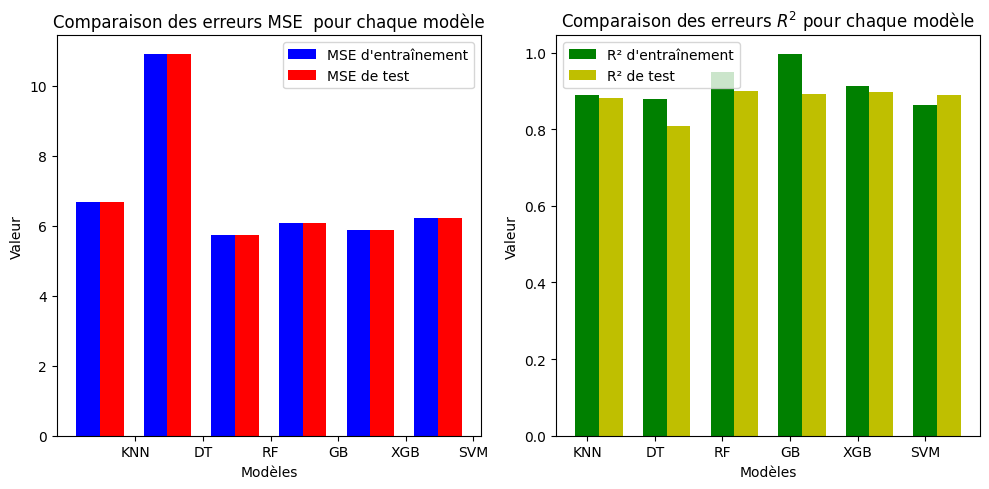

In [54]:
mse_train = all_score_test[:,0]
mse_test = all_score_test[:,0]

r2_train = all_score_train[:,3]
r2_test = all_score_test[:,3]


bar_width = 0.35

index = np.arange(len(name_model))

fig, ax = plt.subplots(1,2, figsize=(10, 5))

# Tracer les barres pour le MSE
ax[0].bar(index - bar_width, mse_train, bar_width, label="MSE d'entraînement", color='b')
ax[0].bar(index, mse_test, bar_width, label="MSE de test", color='r')

ax[0].set_xlabel('Modèles')
ax[0].set_ylabel('Valeur')
ax[0].set_title('Comparaison des erreurs MSE  pour chaque modèle')
ax[0].set_xticks(index + bar_width)
ax[0].set_xticklabels(name_model)
ax[0].legend()

# Tracer les barres pour R², avec une nouvelle position
ax[1].bar(index + bar_width, r2_train, bar_width, label="R² d'entraînement", color='g')
ax[1].bar(index + 2*bar_width, r2_test, bar_width, label="R² de test", color='y')
ax[1].set_xlabel('Modèles')
ax[1].set_ylabel('Valeur')
ax[1].set_title('Comparaison des erreurs $R^2$ pour chaque modèle')
ax[1].set_xticks(index + bar_width)
ax[1].set_xticklabels(name_model)
ax[1].legend()

plt.tight_layout()
plt.show()


Le meilleur modèle parmi ceux évalués est **Random Forest** , car il présente la meilleure performance avec un **R² de 0.90**, un **MSE de 5.55**, et un **RMSE de 2.35**. Autrement dit, il obtient le meilleur score pour tout les métriques sur l'ensemble test. Cela indique que ce modèle a la capacité de mieux expliquer la variance des données et génère des prédictions plus proches des valeurs réelles que les autres modèles, bien qu'il soit suivi de près par **XGB** et **GB** (Gradient Boosting).

## 3. Importance par permutation

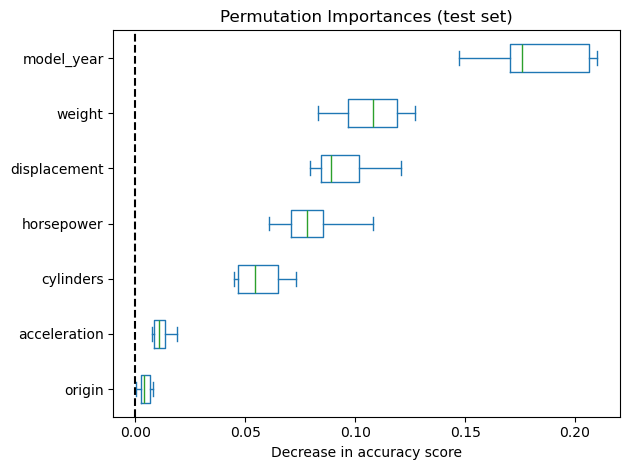

In [472]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

On remarque ici que la variable `model_year` a la plus grande importance (0.17), suivie de près par `weight` (0.12). Ensuite, on trouve `displacement`, `horsepower` et `cylinders`. Cependant, il est important de souligner que toutes les variables ont une certaine importance, même si celle-ci est relativement faible (de l'ordre de 0.01). Cela montre que, même les caractéristiques ayant une faible contribution, jouent un rôle dans la prédiction du modèle.

## 4. Graphiques de dépendance partielle


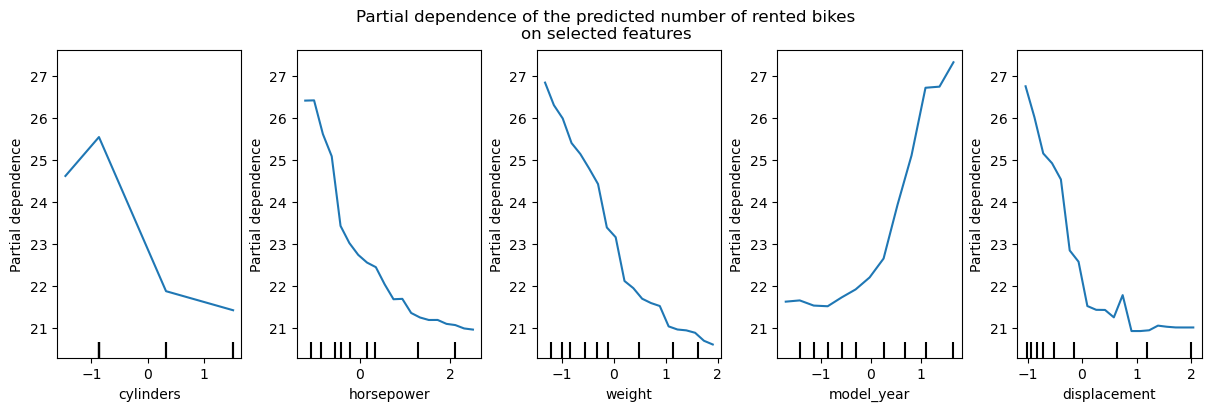

In [482]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

common_params = {
    "subsample": 50,
    "n_jobs": -1,
    "grid_resolution": 20,
    "random_state": 0,
}

# Liste des fonctionnalités que vous souhaitez afficher
features = ['cylinders', 'horsepower', 'weight', 'model_year','displacement']  

# Créez une figure avec 4 axes
fig, ax = plt.subplots(ncols=5, nrows=1, figsize=(12, 4), constrained_layout=True)

# Affichez les dépendances partielles
display = PartialDependenceDisplay.from_estimator(
    model_rf,
    pd.DataFrame(X_test, columns=X.columns),  
    features=features,  # Ajoutez cette ligne
    ax=ax,
    **common_params,
)

# Ajouter un titre à la figure
display.figure_.suptitle(
    "Partial dependence\n",
    fontsize=12,
)

plt.show()

Les graphiques de dépendance partielle montrent que `displacement`, `weight`, `cylinders` et `horsepower` ont une relation décroissante avec la cible, tandis que `model_year` a une relation croissante. Cela signifie que plus `model_year` augmente, plus la prédiction du modèle augmente, alors que pour les autres variables, la prédiction diminue.

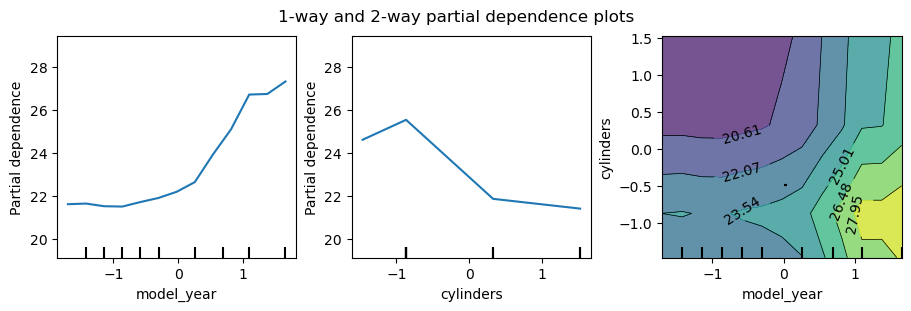

In [483]:
features_info = {
    "features":  ["model_year", "cylinders",("model_year", "cylinders")],
    "kind": "average",
}
fig, ax = plt.subplots(ncols=3, figsize=(9, 3), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    model_rf,
    pd.DataFrame(X_test, columns=X.columns),
    **features_info,
    ax=ax,
    **common_params,
)
fig = display.figure_.suptitle(
    "1-way and 2-way partial dependence plots", fontsize=12
)

Les modèles récents (model_year élevé) et les moteurs avec peu de cylindres consomment le moins de carburant.
À l'inverse, les modèles anciens et les moteurs avec beaucoup de cylindres sont les plus gourmands en carburant.
L'interaction entre ces deux variables indique que l'année de production joue un rôle crucial pour atténuer l'impact négatif des moteurs à cylindres multiples.

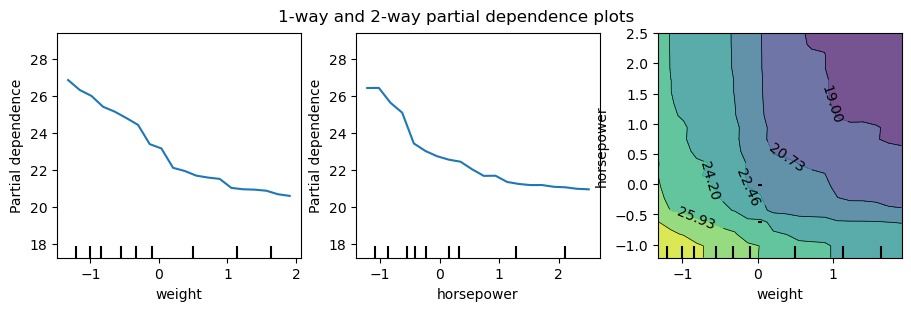

In [484]:
features_info = {
    "features":  ["weight","horsepower",("weight","horsepower")],
    "kind": "average",
}
fig, ax = plt.subplots(ncols=3, figsize=(9, 3), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    model_rf,
    pd.DataFrame(X_test, columns=X.columns),
    **features_info,
    ax=ax,
    **common_params,
)
fig = display.figure_.suptitle(
    "1-way and 2-way partial dependence plots", fontsize=12
)

L'interaction montre que ces deux variables ne sont pas indépendantes : un poids élevé amplifie l'impact d'une puissance élevée, et vice versa.
Les véhicules légers et peu puissants restent les plus économes, ce qui est cohérent avec les principes de l'ingénierie automobile et de l'économie d'énergie.

## Conclusion 

Ce projet nous a permis d'explorer différentes techniques de modélisation pour prédire les performances des voitures en utilisant des modèles d'apprentissage automatique. Nous avons comparé des modèles simples, comme le KNeighborsRegressor, avec des modèles plus complexes tels que le RandomForestRegressor et le GradientBoosting. Les résultats ont montré que, bien qu'un modèle plus complexe comme le RandomForestRegressor offre de bonnes performances, un modèle plus simple comme le KNeighborsRegressor peut également donner des résultats très satisfaisants. Cela met en évidence que le choix du modèle ne dépend pas seulement de sa complexité, mais surtout de la nature des données. Parfois, un modèle simple peut être plus performant si les données sont bien adaptées à ce modèle, prouvant ainsi que la simplicité peut parfois être plus efficace que la complexité.